## SME0828 - Introdução a Ciência de Dados
### Entrega 1 - Pré-processamento de dados

Aluno: Natan Henrique Sanches (11795680)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
#### Exercício 1

Leia os dados com erro (iris-with-errors.csv) novamente, faça a limpeza e remova as duas
últimas colunas.

In [43]:
data = pd.read_csv('drive/MyDrive/data/iris-with-errors.csv', header=(0))

data = data.replace('?', np.nan).dropna().drop_duplicates()
data = data.drop(data.columns[[data.shape[1]-1, data.shape[1]-2]], axis=1)
data.head(25)

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


---
#### Exercício 2

Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada
NaN.

In [44]:
data = pd.read_csv('drive/MyDrive/data/iris-with-errors.csv', header=(0))
data = data.replace('?', np.nan)
X = np.array( data[data.columns[0:data.shape[1]-1]], dtype=float )

for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if (np.isnan(X[i,j]) == True):
            X[i,j] = np.nanmedian(X[i,:], axis=0)

print(X)

[[5.1 3.5 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [1.4 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.1 3.5 1.4 0.2]
 [1.5 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 3.4]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.4 2.9 1.4 0.2]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 3.9]
 [5.1 3.5 1.4 0.3]
 [5.7 1.7 1.7 0.3]
 [1.5 3.8 1.5 0.3]]


---

#### Exercício 3

Conside os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis
após a normalização e padronização.

In [39]:
def show_mean_stddev(X):
    for i in np.arange(X.shape[1]):
        print(f'Mean\t\t(column {i}): {np.round_(np.mean(X[:,i]), decimals=3)}')
        print(f'Standard Dev.\t(column {i}): {np.round_(np.std(X[:,i]), decimals=3)}',
              end='\n\n')

In [ ]:
data = pd.read_csv('drive/MyDrive/data/iris.csv')
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype=float)

In [40]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler(feature_range=(0,1))
X_norm = mm_scaler.fit_transform(X)

show_mean_stddev(X_norm)
X_norm

Mean		(column 0): 0.726
Standard Dev.	(column 0): 0.279

Mean		(column 1): 0.618
Standard Dev.	(column 1): 0.193

Mean		(column 2): 0.567
Standard Dev.	(column 2): 0.231

Mean		(column 3): 0.105
Standard Dev.	(column 3): 0.246



array([[0.84090909, 0.66666667, 0.5       , 0.02631579],
       [0.84090909, 0.66666667, 0.5       , 0.02631579],
       [0.        , 0.48148148, 0.5       , 0.02631579],
       [0.75      , 0.55555556, 0.33333333, 0.02631579],
       [0.84090909, 0.66666667, 0.5       , 0.02631579],
       [0.02272727, 0.51851852, 0.66666667, 0.02631579],
       [0.81818182, 0.7037037 , 0.5       , 0.02631579],
       [0.90909091, 0.81481481, 1.        , 0.07894737],
       [0.90909091, 0.81481481, 1.        , 0.07894737],
       [0.72727273, 0.62962963, 0.5       , 0.86842105],
       [0.81818182, 0.62962963, 0.66666667, 0.02631579],
       [0.68181818, 0.44444444, 0.5       , 0.02631579],
       [0.79545455, 0.51851852, 0.66666667, 0.        ],
       [0.90909091, 0.74074074, 0.66666667, 0.02631579],
       [0.68181818, 0.44444444, 0.5       , 0.02631579],
       [0.77272727, 0.62962963, 0.83333333, 0.02631579],
       [0.77272727, 0.48148148, 0.5       , 0.        ],
       [0.68181818, 0.44444444,

In [41]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(X)
X_std = std_scaler.transform(X)

show_mean_stddev(X_std)
X_std

Mean		(column 0): -0.0
Standard Dev.	(column 0): 1.0

Mean		(column 1): -0.0
Standard Dev.	(column 1): 1.0

Mean		(column 2): 0.0
Standard Dev.	(column 2): 1.0

Mean		(column 3): -0.0
Standard Dev.	(column 3): 1.0



array([[ 4.11023534e-01,  2.53951363e-01, -2.88675135e-01,
        -3.20823506e-01],
       [ 4.11023534e-01,  2.53951363e-01, -2.88675135e-01,
        -3.20823506e-01],
       [-2.60641114e+00, -7.07985617e-01, -2.88675135e-01,
        -3.20823506e-01],
       [ 8.48143800e-02, -3.23210825e-01, -1.01036297e+00,
        -3.20823506e-01],
       [ 4.11023534e-01,  2.53951363e-01, -2.88675135e-01,
        -3.20823506e-01],
       [-2.52485885e+00, -5.15598221e-01,  4.33012702e-01,
        -3.20823506e-01],
       [ 3.29471245e-01,  4.46338758e-01, -2.88675135e-01,
        -3.20823506e-01],
       [ 6.55680399e-01,  1.02350095e+00,  1.87638837e+00,
        -1.06941169e-01],
       [ 6.55680399e-01,  1.02350095e+00,  1.87638837e+00,
        -1.06941169e-01],
       [ 3.26209154e-03,  6.15639667e-02, -2.88675135e-01,
         3.10129389e+00],
       [ 3.29471245e-01,  6.15639667e-02,  4.33012702e-01,
        -3.20823506e-01],
       [-1.59842485e-01, -9.00373013e-01, -2.88675135e-01,
      

---

#### Exercício 4

Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [10]:
data = pd.read_csv('drive/MyDrive/data/iris.csv', header=(0))

X = np.array(data)
X_sampled = []

distinct_classes = np.unique(data[data.columns[-1]])
labeled_classes = np.array(data[data.columns[-1]])

for i in np.arange(distinct_classes.shape[0]):
    labeled_rows = np.argwhere(labeled_classes == distinct_classes[i])
    sample = np.random.choice(labeled_rows[:,0], 10, replace=False)
    X_sampled.append(X[sample, :])

X_sampled = np.array(X_sampled)
X_sampled

array([[[4.6, 3.1, 1.5, 0.2, 'setosa'],
        [4.7, 3.2, 1.6, 0.2, 'setosa'],
        [4.9, 3.0, 1.4, 0.2, 'setosa'],
        [4.4, 3.2, 1.3, 0.2, 'setosa'],
        [4.6, 3.2, 1.4, 0.2, 'setosa'],
        [4.8, 3.1, 1.6, 0.2, 'setosa'],
        [5.4, 3.9, 1.7, 0.4, 'setosa'],
        [4.8, 3.4, 1.9, 0.2, 'setosa'],
        [4.4, 2.9, 1.4, 0.2, 'setosa'],
        [4.9, 3.1, 1.5, 0.1, 'setosa']],

       [[5.9, 3.2, 4.8, 1.8, 'versicolor'],
        [6.7, 3.0, 5.0, 1.7, 'versicolor'],
        [6.2, 2.2, 4.5, 1.5, 'versicolor'],
        [5.5, 2.6, 4.4, 1.2, 'versicolor'],
        [4.9, 2.4, 3.3, 1.0, 'versicolor'],
        [5.5, 2.4, 3.7, 1.0, 'versicolor'],
        [6.7, 3.1, 4.4, 1.4, 'versicolor'],
        [6.0, 2.2, 4.0, 1.0, 'versicolor'],
        [5.7, 2.8, 4.1, 1.3, 'versicolor'],
        [5.5, 2.5, 4.0, 1.3, 'versicolor']],

       [[4.9, 2.5, 4.5, 1.7, 'virginica'],
        [5.8, 2.7, 5.1, 1.9, 'virginica'],
        [7.4, 2.8, 6.1, 1.9, 'virginica'],
        [6.7, 3.3, 5.7, 2.1

---

#### Exercício 5

Monte um boxplot para cada variável dos dados da Iris.

<Figure size 432x288 with 0 Axes>

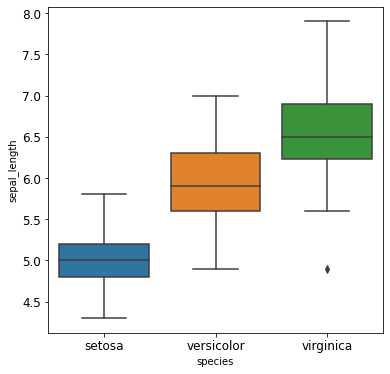

<Figure size 432x288 with 0 Axes>

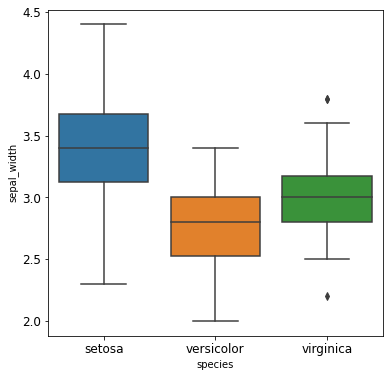

<Figure size 432x288 with 0 Axes>

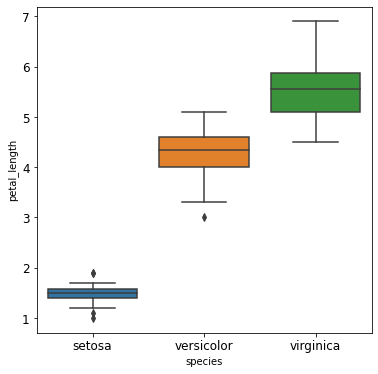

<Figure size 432x288 with 0 Axes>

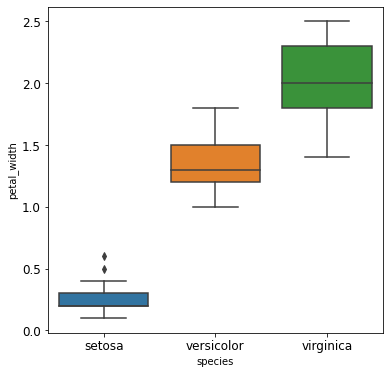

In [9]:
import seaborn as sns

data = pd.read_csv('drive/MyDrive/data/iris.csv', header=(0))

for col in data.columns:
    if col != 'species':
        fig = plt.figure()
        plt.figure(figsize=(6,6))
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        sns.boxplot(x='species', y=col, data=data)

---

#### Exercício 6

Encontre os outliers nos dados das bases Iris e BostonHouse.

In [6]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1

    outliers = ((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)
    return data.drop(data.index[list(np.invert(outliers))], axis=0)

In [7]:
iris = pd.read_csv('drive/MyDrive/data/iris.csv', header=(0))
find_outliers(iris).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [8]:
boston = pd.read_csv('drive/MyDrive/data/BostonHousing.csv', header=(0))
find_outliers(boston).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
